In [1]:
from environment import NormalMoveEnv
from experiment import Experiment
from nn import BetaModel, Model, GeneralModel
from rl import Agent, Trajectory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# %matplotlib inline

# Env

<AxesSubplot: >

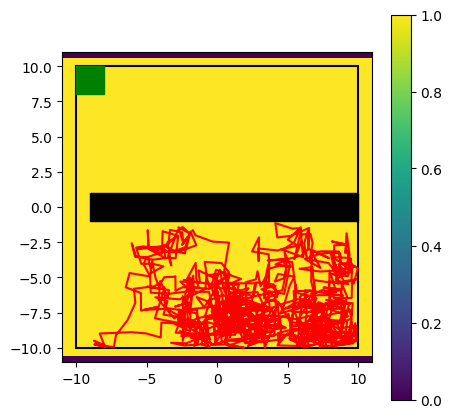

In [2]:
env_params= {
    'walls': [([-9.,-1.],[10., 1.])],
    'goals': [([-10.,8.],[-8.,10.])],
    'start': ([0.,-9.9],[9.9,-7.]),
    'beta': lambda s: (s[1]>-10. and s[1]<10.)
}

env = NormalMoveEnv(**env_params)
# env = NormalMoveEnv()

t = Trajectory(env, size=1_000)
t.plot(env.plot())

# RL Model

Trajectory size: 1


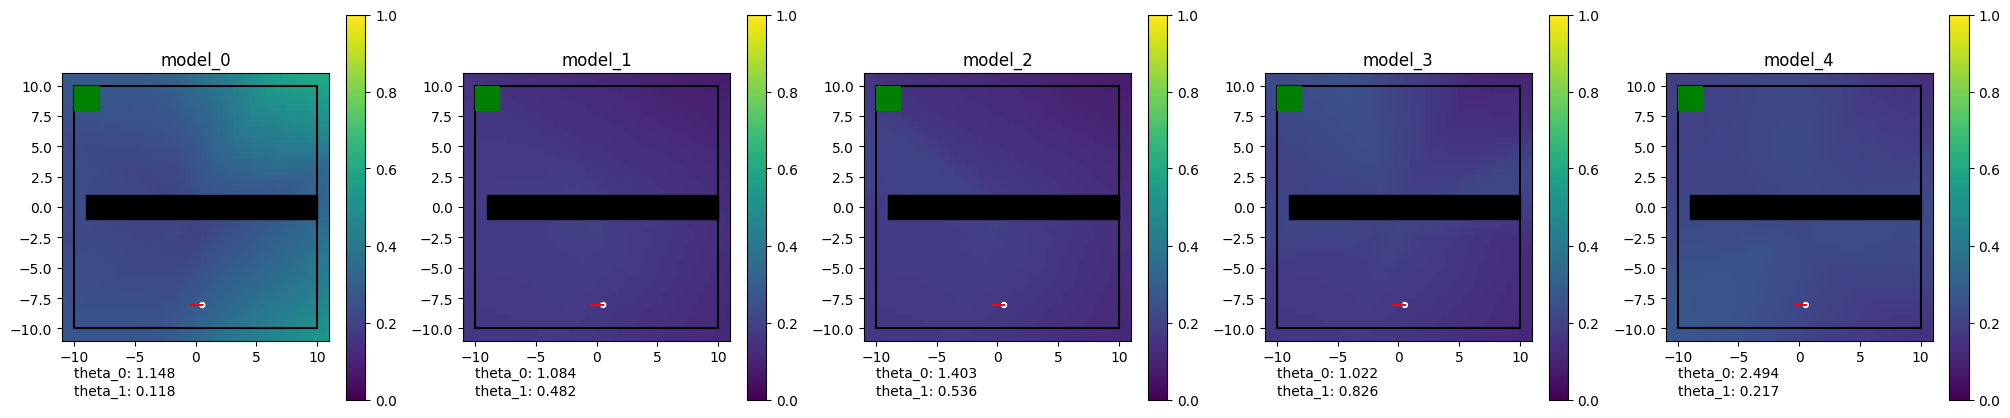

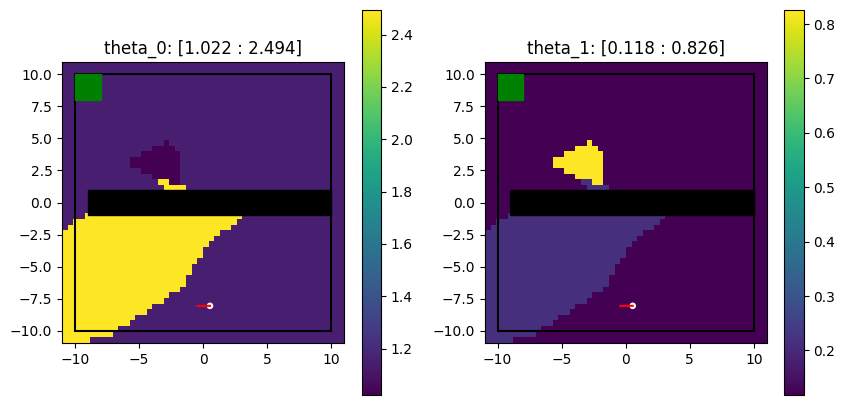

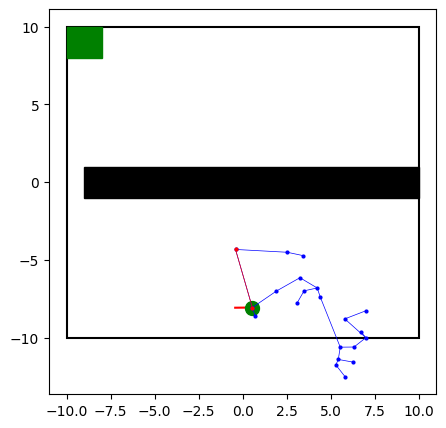

In [3]:
params = {'k':5, "lr":1e-5, 'momentum':.9}
a = Agent(env, td_model_steps=20, memory_size=50, max_plan_size=20, model=Model, **params)
a.episode(size_limit=1)
a.plot(kind='probs')
a.plot()
a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 66


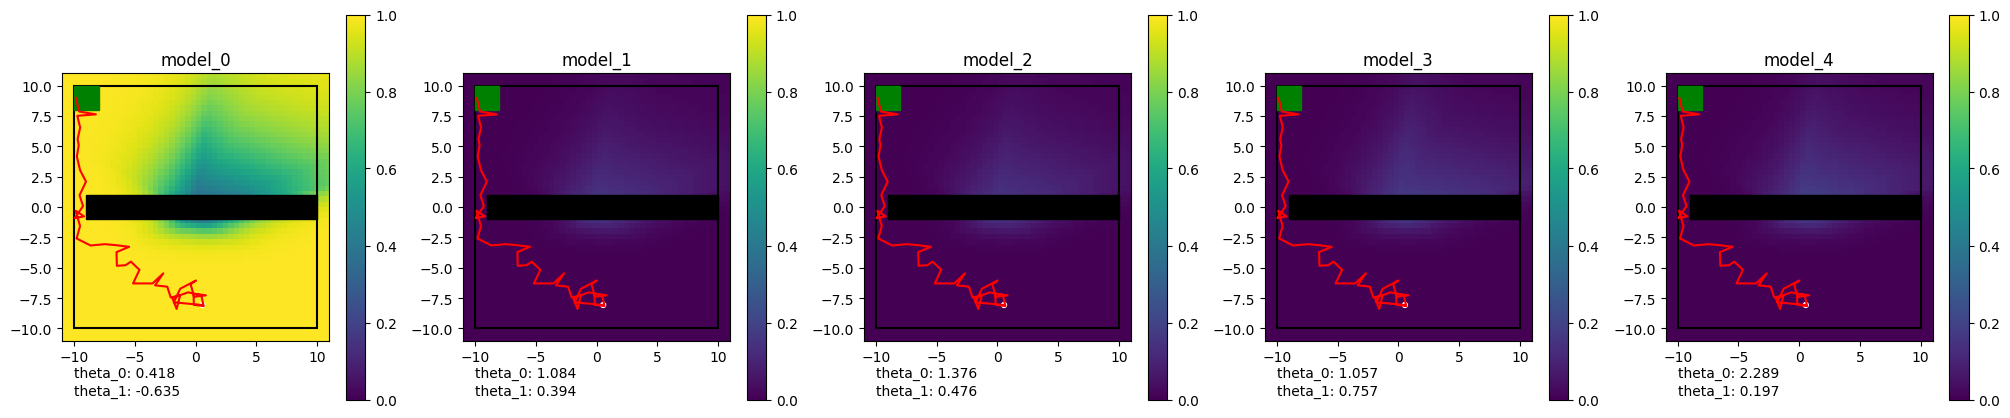

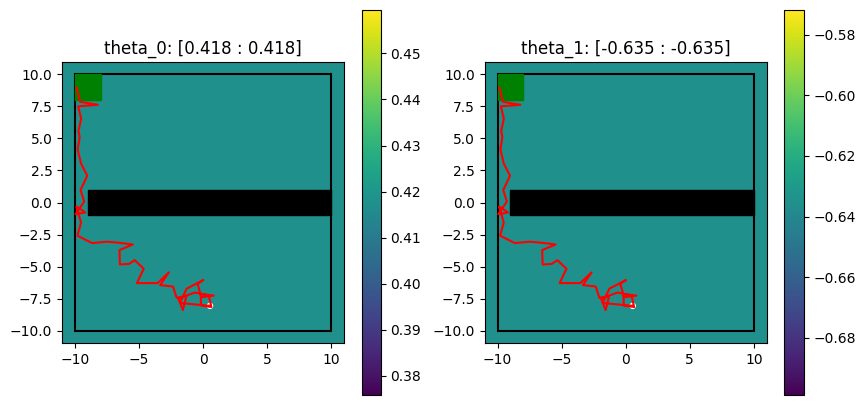

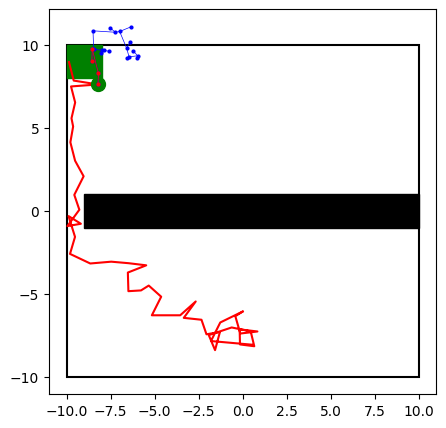

In [7]:
a.episode(size_limit=20)
a.plot(kind='probs')
a.plot()
a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 184


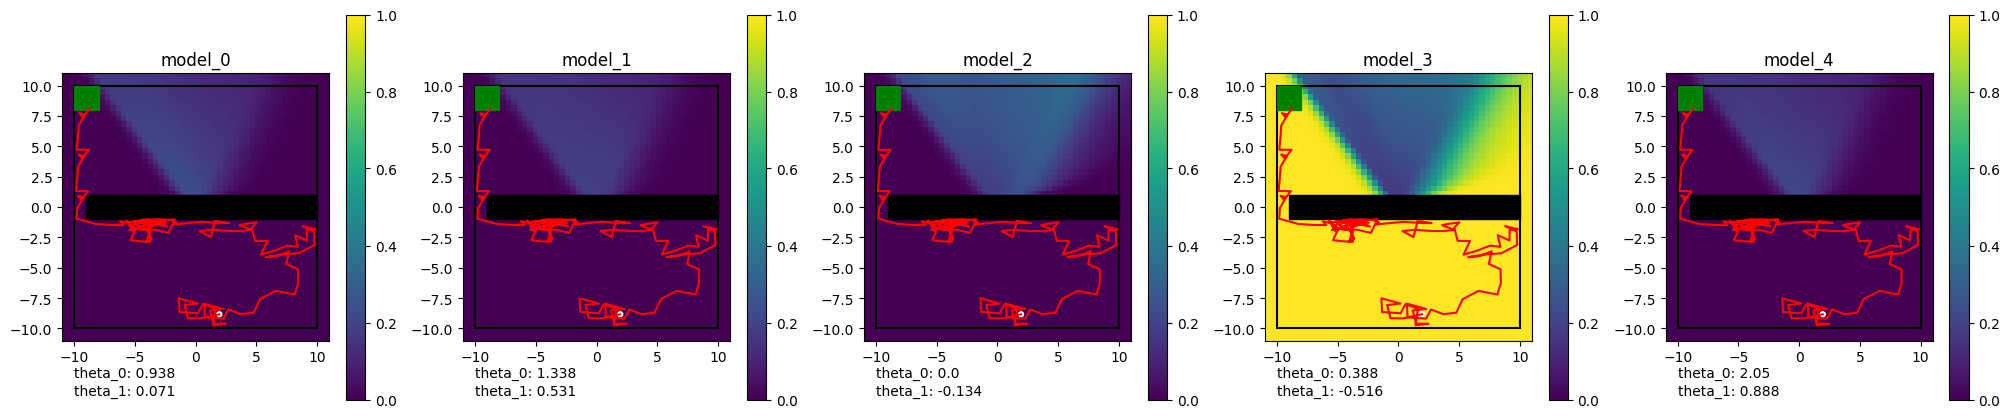

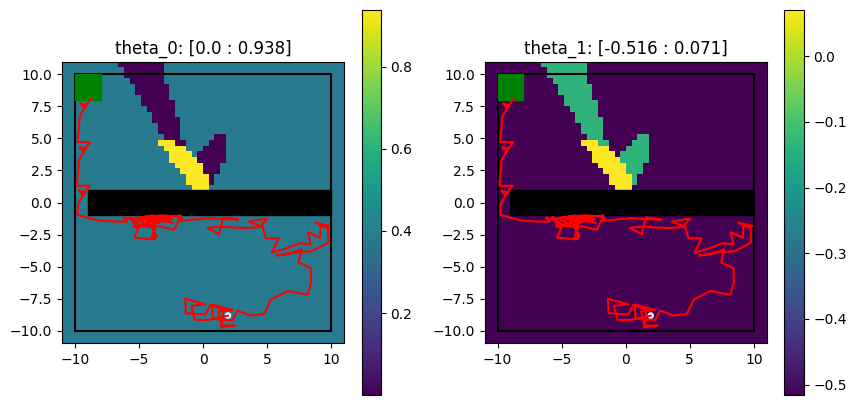

In [9]:
params = {'k':5, "lr":1e-5, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=50, max_plan_size=50, model=Model, **params)
a.episode(size_limit=1000)
a.plot(kind='probs')
a.plot()
# a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 150


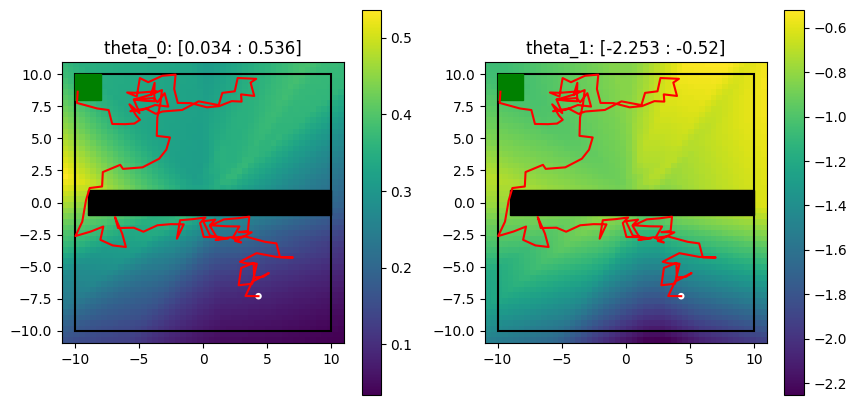

In [10]:
params = {"lr":1e-6, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=50, max_plan_size=50, model=GeneralModel, **params)
a.episode(size_limit=1000)
a.plot()
print(f'Trajectory size: {a.trajectory.run.shape[0]}')